In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations

from sklearn.preprocessing import StandardScaler
import torch

## Load the Data

In [3]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_2/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_2/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Output
0,0.665800,0.123969,0.538996
1,0.877791,0.778628,0.420586
2,0.142699,0.349005,-0.065624
3,0.845275,0.711120,0.293993
4,0.454647,0.290455,0.214965
5,0.577713,0.771973,0.023106
6,0.438166,0.685018,0.244619
7,0.341750,0.028698,0.038749
8,0.338648,0.213867,-0.013858
9,0.702637,0.926564,0.611205


In [4]:
#Adicion de datos conforme el concurso ha avanzado. Por ser aleatorio, añadimos TODA la historia

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Output':-0.044753}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# Datos previos
df.loc[len(df)]=[0.85,0.95,0.03281398]
df.loc[len(df)]=[0.1,0.8,-0.0066341]
df.loc[len(df)]=[9.99999e-01,1.00e-06,-0.0310613]
df.loc[len(df)]=[0.444445,0.999999,0.00346417]
df.loc[len(df)]=[0.7,0.5,0.61214762]
df.loc[len(df)]=[0.919191,0.323233,-0.0719657]

df.loc[len(df)]=[0.85,0.95,0.056781157]
df.loc[len(df)]=[0.1,0.8,-0.12428745]
df.loc[len(df)]=[9.99999e-01,1.00e-06,-0.10761286]
df.loc[len(df)]=[0.444445,0.999999,0.006733207]
df.loc[len(df)]=[0.7,0.5,0.577573737]
df.loc[len(df)]=[0.919191,0.323233,0.20701116]
df.loc[len(df)]=[0.686868,0.313132,0.600318853]
df.loc[len(df)]=[0.747474,0.595959,0.378588808]

df.loc[len(df)]=[0.85,0.95,0.088016]
df.loc[len(df)]=[0.1,0.8,-0.031056]
df.loc[len(df)]=[9.99999e-01,1.00e-06,0.0724]
df.loc[len(df)]=[0.444445,0.999999,-0.034744]
df.loc[len(df)]=[0.7,0.5,0.5777]
df.loc[len(df)]=[0.919191,0.323233,0.1132]
df.loc[len(df)]=[0.686868,0.313132,0.5848]
df.loc[len(df)]=[0.747474,0.595959,0.4177]
df.loc[len(df)]=[0.676767,0.444445,0.5411]

df.loc[len(df)]=[0.85,0.95,-0.0004388]
df.loc[len(df)]=[0.1,0.8,-0.0242251]
df.loc[len(df)]=[9.99999e-01,1.00e-06,-0.0045544]
df.loc[len(df)]=[0.444445,0.999999,0.0401161]
df.loc[len(df)]=[0.7,0.5,0.566159]
df.loc[len(df)]=[0.919191,0.323233,0.1626543]
df.loc[len(df)]=[0.686868,0.313132,0.7304635]
df.loc[len(df)]=[0.747474,0.595959,0.3424652]
df.loc[len(df)]=[0.676767,0.444445,0.4730243]
df.loc[len(df)]=[0.689922,0.930232,0.5528282]
df.loc[len(df)]=[0.620155,0.224807,0.2874767]

df.loc[len(df)]=[0.85,0.95,0.122027605139953]
df.loc[len(df)]=[0.1,0.8,-0.0889288593961448]
df.loc[len(df)]=[9.99999e-01,1.00e-06,0.165863644368646]
df.loc[len(df)]=[0.444445,0.999999,-0.0465986013121763]
df.loc[len(df)]=[0.7,0.5,0.626112703577695]
df.loc[len(df)]=[0.919191,0.323233,-0.00716538428695445]
df.loc[len(df)]=[0.686868,0.313132,0.589090844362322]
df.loc[len(df)]=[0.747474,0.595959,0.421947374798267]
df.loc[len(df)]=[0.676767,0.444445,0.621810482512641]
df.loc[len(df)]=[0.689922,0.930232,0.634094934598757]
df.loc[len(df)]=[0.620155,0.224807,0.128118698292159]
df.loc[len(df)]=[0.728682,0.356589,0.681761728417109]
df.loc[len(df)]=[0.697674,0.333334,0.658811390929695]

df.loc[len(df)]=[0.85,0.95,0.024947012529435]
df.loc[len(df)]=[0.1,0.8,-0.0711334998655379]
df.loc[len(df)]=[9.99999e-01,1.00e-06,0.0218918610019986]
df.loc[len(df)]=[0.444445,0.999999,0.0264093994700683]
df.loc[len(df)]=[0.7,0.5,0.393728279330992]
df.loc[len(df)]=[0.919191,0.323233,-0.0985385416505079]
df.loc[len(df)]=[0.686868,0.313132,0.540893728031824]
df.loc[len(df)]=[0.747474,0.595959,0.239826680336303]
df.loc[len(df)]=[0.676767,0.444445,0.452406455094934]
df.loc[len(df)]=[0.689922,0.930232,0.440856130240411]
df.loc[len(df)]=[0.620155,0.224807,0.0493819861556795]
df.loc[len(df)]=[0.728682,0.356589,0.458054002289972]
df.loc[len(df)]=[0.697674,0.333334,0.771583742325001]
df.loc[len(df)]=[0.759519,0.198397,0.345252976129349]

df.loc[len(df)]=[0.85,0.95,0.0360312526754684]
df.loc[len(df)]=[0.1,0.8,-0.107518114918172]
df.loc[len(df)]=[9.99999e-01,1.00e-06,0.0445556252281038]
df.loc[len(df)]=[0.444445,0.999999,0.0592759215822108]
df.loc[len(df)]=[0.7,0.5,0.658487225068038]
df.loc[len(df)]=[0.919191,0.323233,0.12068870087717]
df.loc[len(df)]=[0.686868,0.313132,0.561984391704738]
df.loc[len(df)]=[0.747474,0.595959,0.369335943138712]
df.loc[len(df)]=[0.676767,0.444445,0.631599380479956]
df.loc[len(df)]=[0.689922,0.930232,0.725546336026734]
df.loc[len(df)]=[0.620155,0.224807,0.255016827871506]
df.loc[len(df)]=[0.728682,0.356589,0.467365961987707]
df.loc[len(df)]=[0.697674,0.333334,0.557442062215012]
df.loc[len(df)]=[0.759519,0.198397,0.325368272645835]
df.loc[len(df)]=[0.669339,0.362725,0.404737545265438]

df.loc[len(df)]=[0.85,0.95,0.194353731594878]
df.loc[len(df)]=[0.1,0.8,-0.0447684603398018]
df.loc[len(df)]=[9.99999e-01,1.00e-06,0.048220446373644]
df.loc[len(df)]=[0.444445,0.999999,0.166502938396395]
df.loc[len(df)]=[0.7,0.5,0.638958342904358]
df.loc[len(df)]=[0.919191,0.323233,0.145954385857006]
df.loc[len(df)]=[0.686868,0.313132,0.550574822916907]
df.loc[len(df)]=[0.747474,0.595959,0.401397378711789]
df.loc[len(df)]=[0.676767,0.444445,0.529693310902435]
df.loc[len(df)]=[0.689922,0.930232,0.544206947068863]
df.loc[len(df)]=[0.620155,0.224807,0.0834391623686953]
df.loc[len(df)]=[0.728682,0.356589,0.535313952135254]
df.loc[len(df)]=[0.697674,0.333334,0.649924033740234]
df.loc[len(df)]=[0.759519,0.198397,0.212479393840379]
df.loc[len(df)]=[0.669339,0.362725,0.534994871968047]
df.loc[len(df)]=[0.723447,0.45491, 0.602547386942905]
df.loc[len(df)]=[0.693387,0.346693,0.5642101691778]

df.loc[len(df)]=[0.85,0.95,0.0678779407308906]
df.loc[len(df)]=[0.1,0.8,-0.0805163557388673]
df.loc[len(df)]=[9.99999e-01,1.00e-06,-0.0118226918859071]
df.loc[len(df)]=[0.444445,0.999999,0.0202572783623127]
df.loc[len(df)]=[0.7,0.5,0.584969957839313]
df.loc[len(df)]=[0.919191,0.323233,-0.0126650973893468]
df.loc[len(df)]=[0.686868,0.313132,0.718519041323278]
df.loc[len(df)]=[0.747474,0.595959,0.250526719565463]
df.loc[len(df)]=[0.676767,0.444445,0.50643944193249]
df.loc[len(df)]=[0.689922,0.930232,0.688865833648654]
df.loc[len(df)]=[0.620155,0.224807,0.246717026153405]
df.loc[len(df)]=[0.728682,0.356589,0.606879294434976]
df.loc[len(df)]=[0.697674,0.333334,0.560126436869866]
df.loc[len(df)]=[0.759519,0.198397,0.494419574217615]
df.loc[len(df)]=[0.669339,0.362725,0.573718875436022]
df.loc[len(df)]=[0.723447,0.45491, 0.599860740986702]
df.loc[len(df)]=[0.693387,0.346693,0.578508980374157]
df.loc[len(df)]=[0.581162,0.462926,0.0687642538180903]
df.loc[len(df)]=[0.675351,0.04008,0.4793265896124]

df.loc[len(df)]=[0.85,0.95,0.173178906767145]
df.loc[len(df)]=[0.1,0.8,0.0938356081004983]
df.loc[len(df)]=[9.99999e-01,1.00e-06,-0.17533501765373]
df.loc[len(df)]=[0.444445,0.999999,0.0109618855925959]
df.loc[len(df)]=[0.7,0.5,0.56941986619069]
df.loc[len(df)]=[0.919191,0.323233,-0.0480780309782354]
df.loc[len(df)]=[0.686868,0.313132,0.562997737230252]
df.loc[len(df)]=[0.747474,0.595959,0.279436174890138]
df.loc[len(df)]=[0.676767,0.444445,0.61374372877109]
df.loc[len(df)]=[0.689922,0.930232,0.633156465685704]
df.loc[len(df)]=[0.620155,0.224807,0.209272444655939]
df.loc[len(df)]=[0.728682,0.356589,0.543396975906025]
df.loc[len(df)]=[0.697674,0.333334,0.615554496579267]
df.loc[len(df)]=[0.759519,0.198397,0.3247643246013]
df.loc[len(df)]=[0.669339,0.362725,0.427890352875678]
df.loc[len(df)]=[0.723447,0.45491, 0.617458848499282]
df.loc[len(df)]=[0.693387,0.346693,0.726043434920231]
df.loc[len(df)]=[0.581162,0.462926,0.232509200279414]
df.loc[len(df)]=[0.675351,0.04008,0.429793468469273]
df.loc[len(df)]=[0.402201,0.514757,0.0150907006689009]

df.loc[len(df)]=[0.85,0.95,0.244267756565018]
df.loc[len(df)]=[0.1,0.8,-0.124765163976631]
df.loc[len(df)]=[9.99999e-01,1.00e-06,-0.106590510197001]
df.loc[len(df)]=[0.444445,0.999999,0.124931203340642]
df.loc[len(df)]=[0.7,0.5,0.619223581624147]
df.loc[len(df)]=[0.919191,0.323233,-0.0262807198211402]
df.loc[len(df)]=[0.686868,0.313132,0.475938793556679]
df.loc[len(df)]=[0.747474,0.595959,0.474336033105305]
df.loc[len(df)]=[0.676767,0.444445,0.542027095359513]
df.loc[len(df)]=[0.689922,0.930232,0.490421592019764]
df.loc[len(df)]=[0.620155,0.224807,0.149303956248159]
df.loc[len(df)]=[0.728682,0.356589,0.482663789895328]
df.loc[len(df)]=[0.697674,0.333334,0.67820396644611]
df.loc[len(df)]=[0.759519,0.198397,0.365912951625757]
df.loc[len(df)]=[0.669339,0.362725,0.547945172756184]
df.loc[len(df)]=[0.723447,0.45491, 0.593256934024047]
df.loc[len(df)]=[0.693387,0.346693,0.565366646077871]
df.loc[len(df)]=[0.581162,0.462926,0.0438099036862146]
df.loc[len(df)]=[0.675351,0.04008,0.38422251449923]
df.loc[len(df)]=[0.402201,0.514757,0.106872019715006]
df.loc[len(df)]=[0.711423,0.450902,0.657871410571788]

df.loc[len(df)]=[0.85,0.95,-0.0665733526933179]
df.loc[len(df)]=[0.1,0.8,0.0431462562659832]
df.loc[len(df)]=[9.99999e-01,1.00e-06,-0.0192111304632911]
df.loc[len(df)]=[0.444445,0.999999,-0.0230761655220267]
df.loc[len(df)]=[0.7,0.5,0.623550572709564]
df.loc[len(df)]=[0.919191,0.323233,0.0360777190872686]
df.loc[len(df)]=[0.686868,0.313132,0.512615758393763]
df.loc[len(df)]=[0.747474,0.595959,0.45259825745034]
df.loc[len(df)]=[0.676767,0.444445,0.421202591157764]
df.loc[len(df)]=[0.689922,0.930232,0.536378827261075]
df.loc[len(df)]=[0.620155,0.224807,0.173467651969466]
df.loc[len(df)]=[0.728682,0.356589,0.446130161462852]
df.loc[len(df)]=[0.697674,0.333334,0.608947176355575]
df.loc[len(df)]=[0.759519,0.198397,0.21146377201724]
df.loc[len(df)]=[0.669339,0.362725,0.634887832545827]
df.loc[len(df)]=[0.723447,0.45491, 0.603292095040866]
df.loc[len(df)]=[0.693387,0.346693,0.627186397722665]
df.loc[len(df)]=[0.581162,0.462926,0.175858538227847]
df.loc[len(df)]=[0.675351,0.04008,0.658881607228177]
df.loc[len(df)]=[0.402201,0.514757,-0.08899971550009]
df.loc[len(df)]=[0.711423,0.450902,0.519872094888318]
df.loc[len(df)]=[0.513026,0.58517,0.77291728000203]

df.loc[len(df)]=[0.85,0.95,0.0992155587639771]
df.loc[len(df)]=[0.1,0.8,-0.0522735981319875]
df.loc[len(df)]=[9.99999e-01,1.00e-06,-0.0736085294315992]
df.loc[len(df)]=[0.444445,0.999999,-0.0253183189935929]
df.loc[len(df)]=[0.7,0.5,0.551826092559862]
df.loc[len(df)]=[0.919191,0.323233,0.0839943931458448]
df.loc[len(df)]=[0.686868,0.313132,0.584344421199796]
df.loc[len(df)]=[0.747474,0.595959,0.392829186083552]
df.loc[len(df)]=[0.676767,0.444445,0.57393812706933]
df.loc[len(df)]=[0.689922,0.930232,0.646837987633788]
df.loc[len(df)]=[0.620155,0.224807,0.240919217270358]
df.loc[len(df)]=[0.728682,0.356589,0.474477888071579]
df.loc[len(df)]=[0.697674,0.333334,0.533825336107747]
df.loc[len(df)]=[0.759519,0.198397,0.262800298770008]
df.loc[len(df)]=[0.669339,0.362725,0.47988151991923]
df.loc[len(df)]=[0.723447,0.45491, 0.543913814351662]
df.loc[len(df)]=[0.693387,0.346693,0.644813396103548]
df.loc[len(df)]=[0.581162,0.462926,0.0463000646998109]
df.loc[len(df)]=[0.675351,0.04008,0.571652904120753]
df.loc[len(df)]=[0.402201,0.514757,0.0605681280552977]
df.loc[len(df)]=[0.711423,0.450902,0.460256044952377]
df.loc[len(df)]=[0.513026,0.58517,0.680332219771749]
df.loc[len(df)]=[0.521042,0.58517,0.615466065182522]

df.loc[len(df)]=[0.85,0.95,0.114155722738714]
df.loc[len(df)]=[0.1,0.8,0.0807454770044068]
df.loc[len(df)]=[9.99999e-01,1.00e-06,0.0418449521512583]
df.loc[len(df)]=[0.444445,0.999999,0.018296049733515]
df.loc[len(df)]=[0.7,0.5,0.564235790955601]
df.loc[len(df)]=[0.919191,0.323233,-0.0921577219658981]
df.loc[len(df)]=[0.686868,0.313132,0.607688914933705]
df.loc[len(df)]=[0.747474,0.595959,0.256560621892255]
df.loc[len(df)]=[0.676767,0.444445,0.59911422823507]
df.loc[len(df)]=[0.689922,0.930232,0.764089099477069]
df.loc[len(df)]=[0.620155,0.224807,0.117083774768954]
df.loc[len(df)]=[0.728682,0.356589,0.576679096816554]
df.loc[len(df)]=[0.697674,0.333334,0.632609053923194]
df.loc[len(df)]=[0.759519,0.198397,0.205072856063292]
df.loc[len(df)]=[0.669339,0.362725,0.540486656719064]
df.loc[len(df)]=[0.723447,0.45491, 0.523554506035786]
df.loc[len(df)]=[0.693387,0.346693,0.56991434606123]
df.loc[len(df)]=[0.581162,0.462926,0.158960329582192]
df.loc[len(df)]=[0.675351,0.04008,0.518793286770073]
df.loc[len(df)]=[0.402201,0.514757,0.0399980948432447]
df.loc[len(df)]=[0.711423,0.450902,0.657040602665327]
df.loc[len(df)]=[0.513026,0.58517,0.689536716066483]
df.loc[len(df)]=[0.521042,0.58517,0.619589686338264]
df.loc[len(df)]=[0.496994,0.579158,0.799203501883715]


#Print
df

,Input_1,Input_2,Output
0,0.665800,0.123969,0.538996
1,0.877791,0.778628,0.420586
2,0.142699,0.349005,-0.065624
3,0.845275,0.711120,0.293993
4,0.454647,0.290455,0.214965
...,...,...,...
228,0.402201,0.514757,0.039998
229,0.711423,0.450902,0.657041
230,0.513026,0.585170,0.689537
231,0.521042,0.585170,0.619590


In [5]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

Basic Statistical Summary:
          Input_1     Input_2      Output
count  233.000000  233.000000  233.000000
mean     0.663997    0.484854    0.327755
std      0.206754    0.286152    0.268711
min      0.100000    0.000001   -0.175335
25%      0.620155    0.323233    0.049382
50%      0.693387    0.444445    0.392829
75%      0.747474    0.595959    0.571653
max      0.999999    0.999999    0.799204


In [6]:
# File paths SEGUNDO SET
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_2/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_2/initial_outputs.npy"

# Load the data
inputs2 = np.load(input_file_path)
outputs2 = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df2 = pd.DataFrame(inputs2, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df2['Output'] = outputs2

df2

,Input_1,Input_2,Output
0,0.331626,0.080499,-0.029954
1,0.100533,0.477595,0.083120
2,0.677932,0.873704,0.561143
3,0.134956,0.521158,0.013477
4,0.537156,0.244715,0.389944
5,0.659128,0.630642,0.422018
6,0.470452,0.533768,0.586957
7,0.721202,0.364506,0.569550
8,0.722734,0.438018,0.694832
9,0.240668,0.141229,0.033768


In [7]:
df = pd.concat([df, df2], ignore_index=True)
df


,Input_1,Input_2,Output
0,0.665800,0.123969,0.538996
1,0.877791,0.778628,0.420586
2,0.142699,0.349005,-0.065624
3,0.845275,0.711120,0.293993
4,0.454647,0.290455,0.214965
...,...,...,...
238,0.659128,0.630642,0.422018
239,0.470452,0.533768,0.586957
240,0.721202,0.364506,0.569550
241,0.722734,0.438018,0.694832


# Function 2: Optimising Noisy Models
### This corresponds to trying to optimise an unknown machine learning model. However, the initialization of the model is very important, meaning your observations will be very noisy, and the problem might have a lot of local optima! You are trying to make the model’s log-likelihood as large as possible.

## Data exploration

In [10]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
          Input_1     Input_2      Output
count  243.000000  243.000000  243.000000
mean     0.655587    0.482620    0.327950
std      0.211720    0.284065    0.268546
min      0.100000    0.000001   -0.175335
25%      0.620155    0.318183    0.048801
50%      0.689922    0.444445    0.392829
75%      0.747474    0.595959    0.570784
max      0.999999    0.999999    0.799204

Missing values in the dataset:
Input_1    0
Input_2    0
Output     0
dtype: int64


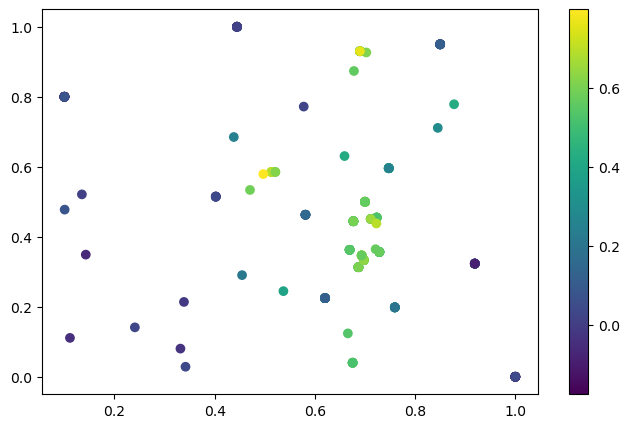

In [11]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(df['Input_1'], df['Input_2'], c = df['Output'])
plt.colorbar();

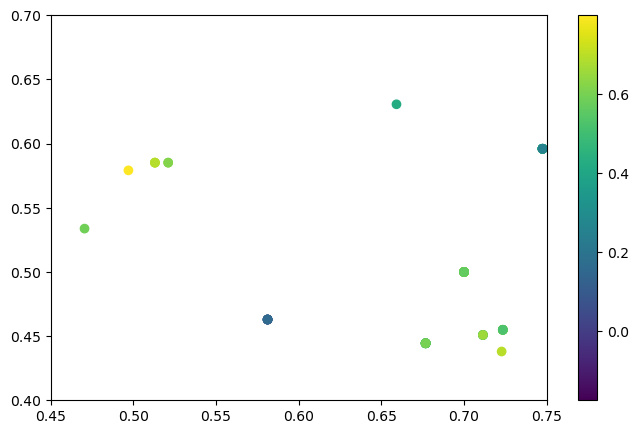

In [12]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(df['Input_1'], df['Input_2'], c = df['Output'])
plt.xlim(0.45, 0.75)  # Set x-axis limits
plt.ylim(0.40, 0.70)  # Set y-axis limits
plt.colorbar();

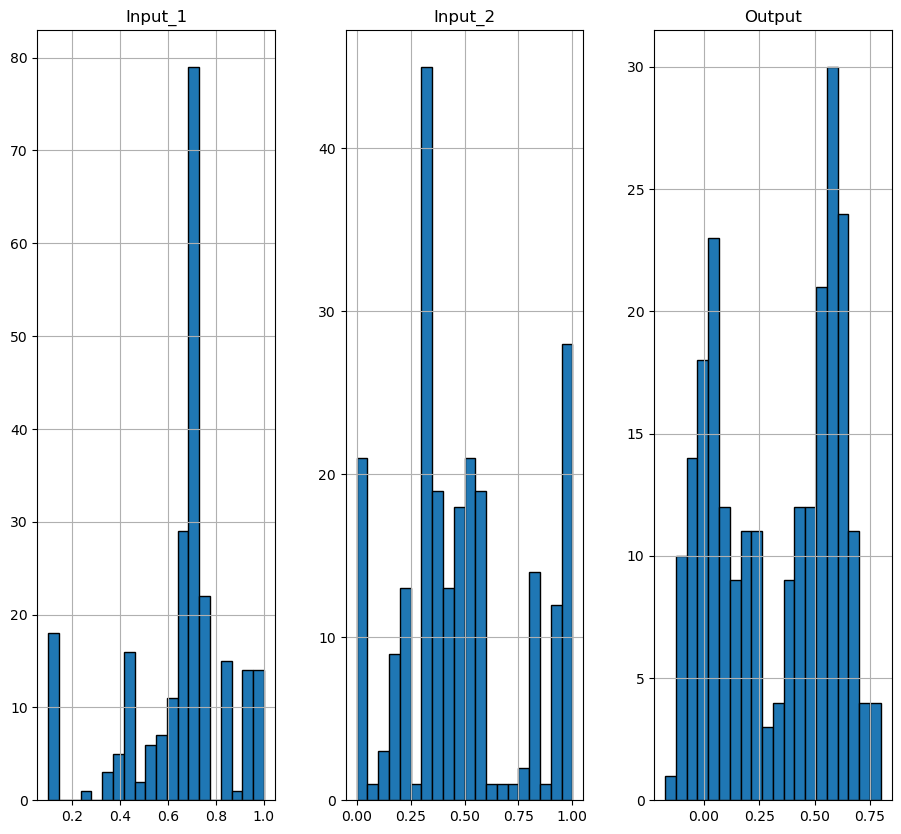

In [22]:
# Plot histograms for each column to understand distributions
df.hist(bins=20, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

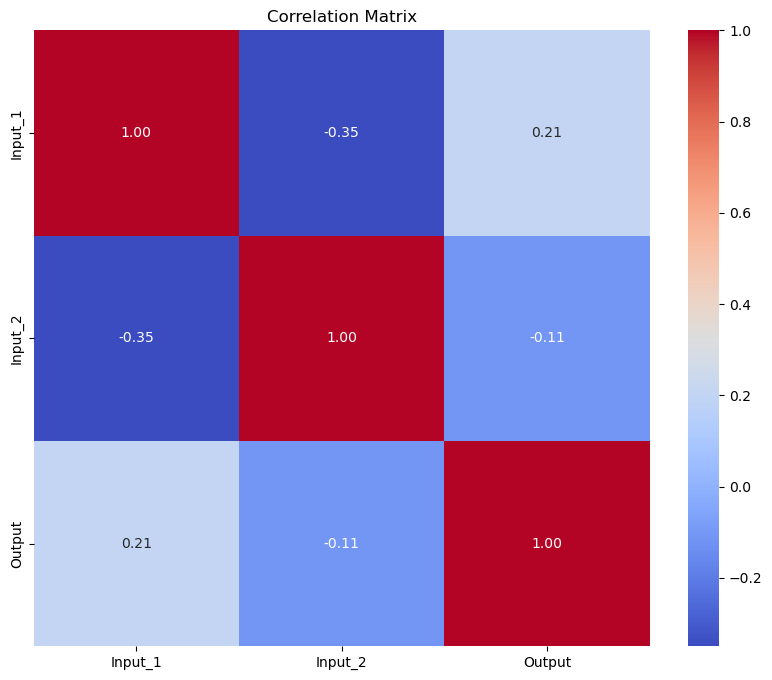

In [23]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

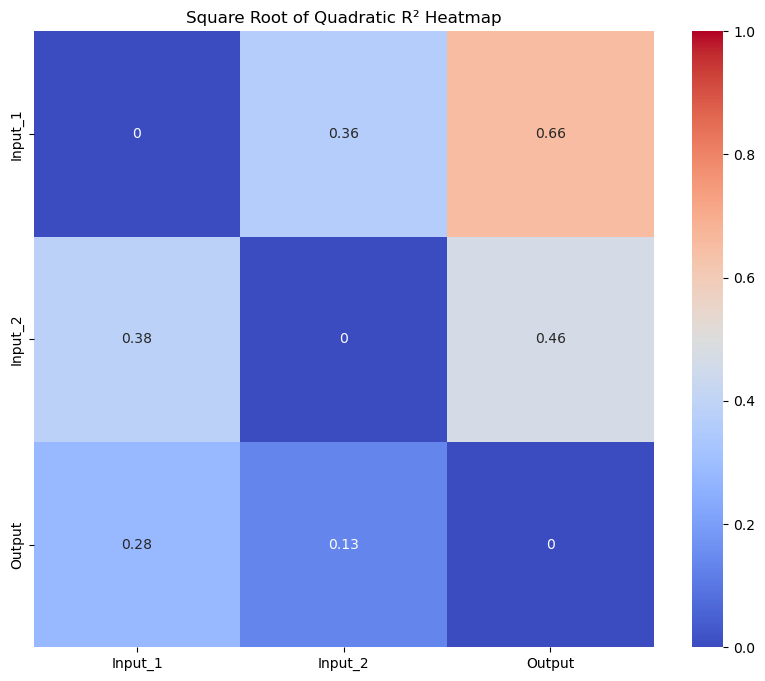

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def compute_quadratic_sqrt_r2(x, y):
    x = x[:, np.newaxis]
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    return np.sqrt(r2_score(y, y_poly_pred))

def quadratic_sqrt_r2_matrix(data):
    cols = data.columns
    sqrt_r2_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                sqrt_r2_matrix.iloc[i, j] = compute_quadratic_sqrt_r2(data[cols[i]].values, data[cols[j]].values)
    
    return sqrt_r2_matrix

def plot_heatmap(sqrt_r2_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(sqrt_r2_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('Square Root of Quadratic R² Heatmap')
    plt.show()


# Compute square root of R² matrix
sqrt_r2_matrix = quadratic_sqrt_r2_matrix(df)

# Plot heatmap
plot_heatmap(sqrt_r2_matrix)

/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


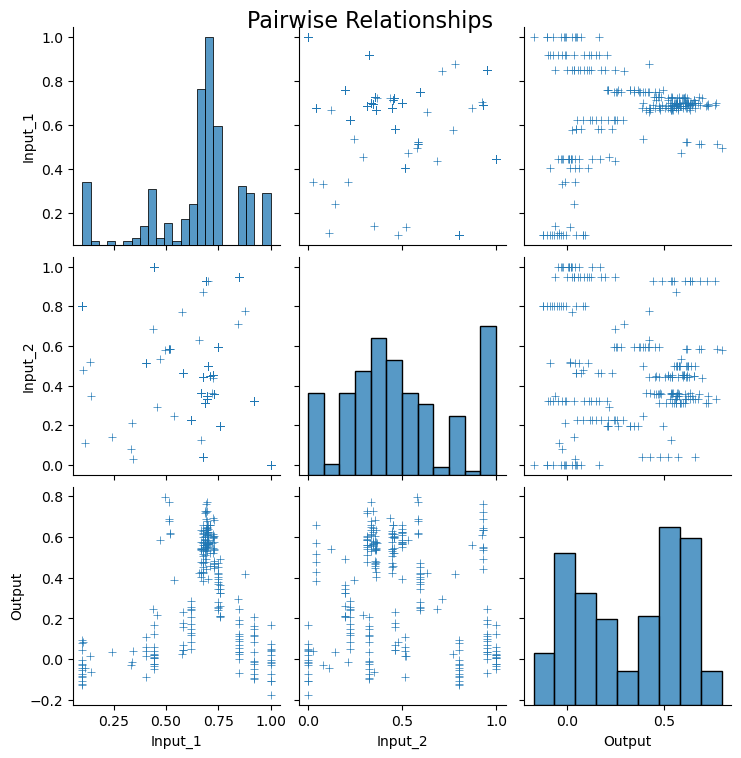

In [28]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

## 

# New model pero con datos completos // sin modelo de ruido


In [32]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df[['Input_1', 'Input_2']].values
y = df[['Output']].values

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 0.5, name='length_scale'),
    Real(1e-6, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

# Define ranges for each input
input_ranges = [(0.0, 1.0), (0.00, 1.0)]  # Example ranges for two inputs

GG = 500  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)
X_grid_scaled = scaler_X.transform(X_grid)  # Scale the grid points

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 0.01
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")


# Test different beta values for UCB and other acquisition functions
for beta in [0.5,1,1.5 ,1.96, 2.6]:
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")



Best length scale: 0.38238480834480526
Best noise level: 0.08115421496704599
Next query point UCB with Beta 0.01: [0.494990-0.579158]
Next query point UCB with Beta 0.5: [0.492986-0.581162]
Next query point UCB with Beta 1: [0.488978-0.587174]
Next query point UCB with Beta 1.5: [0.484970-0.593186]
Next query point UCB with Beta 1.96: [0.482966-0.597194]
Next query point UCB with Beta 2.6: [0.567134-0.048096]


/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


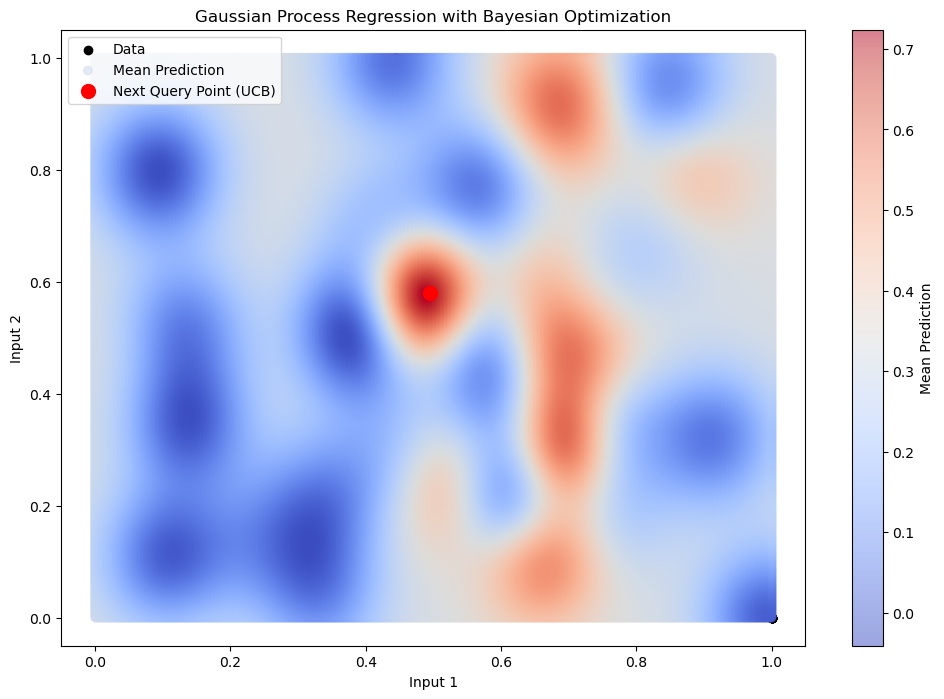

In [33]:
# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c='black', label='Data')
plt.scatter(X_grid[:, 0], X_grid[:, 1], c=mean, cmap='coolwarm', label='Mean Prediction', alpha=0.5)
plt.colorbar(label='Mean Prediction')
plt.scatter(next_query_ucb[0], next_query_ucb[1], color='red', s=100, label='Next Query Point (UCB)')
plt.title('Gaussian Process Regression with Bayesian Optimization')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.show()


# Modelo de ruido con datos completos


In [35]:
# If there are multiple outputs for the same input, aggregate them
historical_feedback = df.groupby(['Input_1', 'Input_2']).agg(
    mean_output=('Output', 'mean'),
    var_output=('Output', 'var')
).reset_index()

# Fill NaN values in var_output with a small positive number
historical_feedback['var_output'].fillna(1e-10, inplace=True)

print(historical_feedback)

     Input_1   Input_2  mean_output    var_output
0   0.100000  0.800000    -0.038456  4.987689e-03
1   0.100533  0.477595     0.083120  1.000000e-10
2   0.111111  0.111111    -0.044753  1.000000e-10
3   0.134956  0.521158     0.013477  1.000000e-10
4   0.142699  0.349005    -0.065624  1.000000e-10
5   0.240668  0.141229     0.033768  1.000000e-10
6   0.331626  0.080499    -0.029954  1.000000e-10
7   0.338648  0.213867    -0.013858  1.000000e-10
8   0.341750  0.028698     0.038749  1.000000e-10
9   0.402201  0.514757     0.026706  5.318160e-03
10  0.438166  0.685018     0.244619  1.000000e-10
11  0.444445  0.999999     0.024801  3.539617e-03
12  0.454647  0.290455     0.214965  1.000000e-10
13  0.470452  0.533768     0.586957  1.000000e-10
14  0.496994  0.579158     0.799204  1.000000e-10
15  0.513026  0.585170     0.714262  2.601506e-03
16  0.521042  0.585170     0.617528  8.502126e-06
17  0.537156  0.244715     0.389944  1.000000e-10
18  0.577713  0.771973     0.023106  1.000000e-10


In [36]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_ei, gaussian_pi, gaussian_lcb
from sklearn.preprocessing import StandardScaler
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning


# If there are multiple outputs for the same input, aggregate them
historical_feedback = df.groupby(['Input_1', 'Input_2']).agg(
    mean_output=('Output', 'mean'),
    var_output=('Output', 'var')
).reset_index()

# Fill NaN values in var_output with a small positive number
historical_feedback['var_output'].fillna(1e-10, inplace=True)

#print(historical_feedback)

# Prepare data for GP model
X = historical_feedback[['Input_1', 'Input_2']]
y_mean = historical_feedback['mean_output']
y_var = historical_feedback['var_output']

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y_mean = StandardScaler()
y_mean_scaled = scaler_y_mean.fit_transform(y_mean.values.reshape(-1, 1)).flatten()

# Incorporate variance into noise level
noise_level_scaled = scaler_y_mean.transform(y_var.values.reshape(-1, 1)).flatten()

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 0.5, name='length_scale'),
    Real(1e-15, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=1e-5)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=1.0, optimizer=None)  # Significantly increased alpha
    GPR_model.fit(X_scaled, y_mean_scaled + 1e-5 * np.random.randn(*y_mean_scaled.shape))  # Regularize targets
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel with WhiteKernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=1e-5)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=1.0, optimizer=None)  # Significantly increased alpha
GPR_model_best.fit(X_scaled, y_mean_scaled + 1e-5 * np.random.randn(*y_mean_scaled.shape))  # Regularize targets

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

# Define ranges for each input
input_ranges = [(0.0, 1.0), (0.0, 1.0)]  # Example ranges for two inputs

GG = 500  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)
X_grid_scaled = scaler_X.transform(X_grid)  # Scale the grid points

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y_mean.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y_mean.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 0.01
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Test different beta values for UCB and other acquisition functions
for beta in [1, 1.96, 2.6]:
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")


/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1] before, using random point [0.21283856742526466, 0.02214851958407161]
  warnings.warn(
/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1] before, using random point [0.3952211389291792, 0.08565630563575488]
  warnings.warn(
/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1] before, using random point [0.40054850474866344, 0.01692251433796961]
  warnings.warn(
/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1] before, using random point [0.041399983275293484, 0.01571931622284573]
  warnings.warn(
/opt/anacond

Best length scale: 0.5
Best noise level: 0.1


/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Next query point UCB with Beta 0.01: [0.721443-0.410822]
Next query point UCB with Beta 1: [0.755511-0.422846]
Next query point UCB with Beta 1.96: [0.655311-1.000000]
Next query point UCB with Beta 2.6: [1.000000-0.607214]
